
<font color="gray"> Prepared by Ghanashyam Khanal, 07/24/2021 for LOCUS Workshop in Quantum Computing 2021. Find Details [here](https://locus.pcampus.edu.np/locus-2021-events/quantum-computing/).</font>

-----

# <font color="Purple">Quantum Fourier Transformation</font>

* Linear transformation between different bases.
* Quantum Analogue of <font color="green">**Discrete Fourier Transformation (DFT)** </font>


$$|\text{State in a Computational Basis} \rangle \xrightarrow{\text{QFT}} |\text{State in Fourier Basis}  \rangle $$

* Most popular application in Shor's factoring algorithm. **Wait for Tomorrow's lecture**


## <font color="Purple">Definition</font>

<img src="images/qft_def.png" alt="" width="500" align="left">

Where,
- $a_j$ are the amplitudes corresponding to the basis states $|j \rangle_n$
- $b_j$ are teh amplitutes in the Fourier Basis.
- $N=2^n$ is the size of the Hilbert Space (basis set) for the problem with given number of qubit ($n$). 


### <font color="Purple">1 Qubit</font>

**Mathematical Derivation**

Using the following formula:

$$b_j = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} a_k e^{\frac{2\pi j k i}{N}} $$

For 1 qubit: $n=1$ and $N=2^1=2$

$$b_0 = \frac{1}{\sqrt2}  (a_0 + a_1) $$

$$b_1 = \frac{1}{\sqrt2}  (a_0 - a_1) $$

Where in the last term I used $$e^{2 \pi i/2 } = e^{i \pi/} = -1 $$


for State $|0\rangle$ we have $a_0=1 $ and $a_1=0 $ $\implies$ $b_0=\frac{1}{\sqrt2}$ and $b_1=\frac{1}{\sqrt2}$

for State $|1\rangle$ we have $a_0=0 $ and $a_1=1 $ $\implies$ $b_0=\frac{1}{\sqrt2}$ and $b_1=-\frac{1}{\sqrt2}$

$$\textbf{QFT}_1 |0\rangle  = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle ) $$
$$\textbf{QFT}_1 |1\rangle  = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle ) $$



In general the QFT can be cast into the following matrix form:
$$\textbf{QFT}_1 |\phi \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 & 1 \\ 1& -1\end{bmatrix} \begin{bmatrix} |0\rangle \\ |1\rangle \end{bmatrix}  $$

<font color="maroon">Simple but tedious looking algebra!</font>

<font color="purple">**Is there an easier way?**</font>

<font color="green">**Yes**</font>


### <font color="purple">Matrix Form</font>

By levereging the Euler's formula for $N^{th}$ root of unity, in the following equation

$$b_j = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} a_k \omega^{j k} $$


We can write the General Matrix form for **QFT** as

$F_{N}  =  \frac{1}{\sqrt{N}} \begin{bmatrix}
    1  &         1   &        1       &     1          &   \cdots   &  1   \\
    1  &  \omega  & \omega ^{2} & \omega ^{3} &   \cdots   & \omega  ^{N-1}\\
    1  &  \omega ^{2} & \omega ^{4} & \omega ^{6} &   \cdots   & \omega  ^{2(N-1)}\\
    1  &  \omega ^{3} & \omega ^{6} & \omega ^{9} &   \cdots   & \omega  ^{3(N-1)}\\
   \vdots  & \vdots  & \vdots         & \vdots         &    \dots   & \vdots \\
   1  &  \omega ^{(N-1)} & \omega ^{2(N-1)} & \omega ^{3(N-1)} &   \cdots   & \omega  ^{(N-1)((N-1)}\\
\end{bmatrix}$

Where $\omega$ is the $N^{th}$ of Unity.


For 1 qubit: $n=1$ and $N=2^1=2$ So, 

$$F_2 = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 & 1 \\ 1& -1\end{bmatrix} $$

The above matrix is exactly the same as the matrix form of the <font color="green">**Hadamard Gate** </font>.


## <font color="Purple">**Circuit Implementation for QFT** </font>

We use the following gates to construct QFT circuit.
- single qubit Hadamard Gate.
$$H = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 & 1 \\ 1& -1\end{bmatrix} $$


- 2 qubit controlled rotation CROT_k.

$$\text{CROT}_k = \frac{1}{\sqrt{2}} \begin{bmatrix}  I & 1 \\ 1& \text{UROT}_k\end{bmatrix} $$

Where, 

$$\text{UROT}_k = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 & 0 \\ 0 &exp(\frac{2 \pi i}{2^k} )   \end{bmatrix} $$

**Note** that CROT gate doesn't change the first qubit and only changes the phase of second qubit by $e^{\frac{2 \pi i}{2^k}} $

- SWAP gate when we need to swap two qubits

$$\text{SWAP} = \begin{bmatrix}  1 & 0 & 0 & 0 \\  0 & 0 & 1 & 0 \\  0 & 1 & 0 & 0   \\  0 & 0 & 0 & 1 \end{bmatrix} $$






### <font color="Purple">**Circuit Implementation : 1 qubit** </font>

In [1]:
# import necesssary packages
import warnings
warnings.filterwarnings("ignore")

from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit import execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_city
from qiskit.visualization import array_to_latex

import matplotlib.pylab as plt
import numpy as np
from numpy import pi as PI

#%matplotlib inline

style = {'backgroundcolor': 'beige'}

In [2]:
def QFT_1():
    n=1
    
    # define quantum and classical registers
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')
    
    # Initiate the quantum circuit
    qc = QuantumCircuit(q, c)
    # apply Hadamard gate to q=0 qubit
    qc.h(q[0])
    return qc, q, c

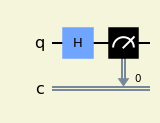

In [3]:
qc_1, q, c = QFT_1()
qc_1.measure(q,c)
qc_1.draw(output="mpl", style=style, scale=1.)

### <font color="Purple">**Simulate the Experiment** </font>

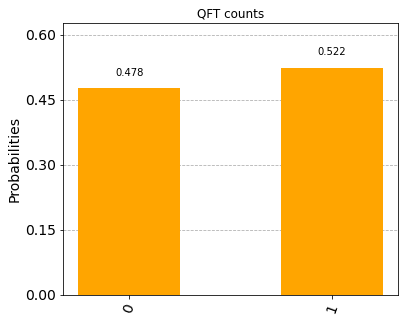

In [4]:
def simulate_counts(qc,  figsize=(8,5)):
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, simulator).result()
    counts = result.get_counts()
    display( plot_histogram(counts, title='QFT counts', figsize=figsize, color="orange") )
    
simulate_counts(qc_1,  figsize=(6,5))

### <font color="Purple">**State Vector Simulator** </font>

In [5]:
def simulate_state_vector(qc):
    
    backend = Aer.get_backend('statevector_simulator')
    psi = execute(qc, backend=backend).result().get_statevector()
    display( array_to_latex(psi) )
    #display( plot_bloch_multivector(psi) )
    display( plot_state_city(psi) )
    return psi

<IPython.core.display.Latex object>

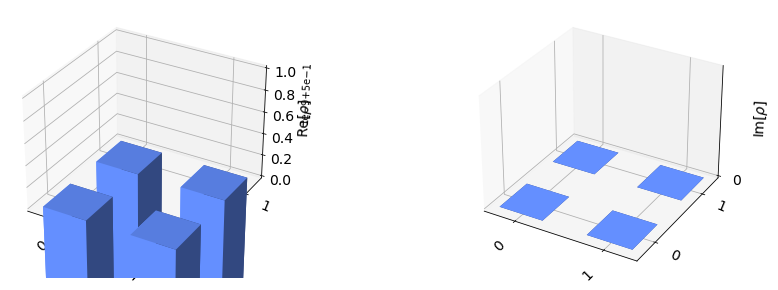

In [6]:
qc_1, q, c = QFT_1()
psi1 = simulate_state_vector(qc_1)

### <font color="Purple">**Unitary Simulator** </font>

In [7]:
def simulate_unitary_matrix(qc):
    backend = Aer.get_backend('unitary_simulator')
    result = execute(qc, backend=backend).result()
    U = result.get_unitary()
    return U

In [8]:
qc_1, q, c = QFT_1()
U1 = simulate_unitary_matrix(qc_1)
display( array_to_latex(U1) )

<IPython.core.display.Latex object>

### <font color="Purple">2 Qubits</font>

For two qubits circuit, ($n =2, N = 2^{2} = 4)$

$4^{th}$ root of unity: 

$\omega_{n} = e^{\frac{2\pi i}{2^{n}}} = (1, i, -1, -i)$ 

The primitive root: $\omega = i$

$QFT_2 = \frac{1}{\sqrt{4}} \begin{bmatrix}
    1  &   1  &  1  &   1\\
    1  &   i  &  -1  &  -i\\
    1  &   -1  &  1  &   -1\\
    1  &  -i  &  -1  &  i
\end{bmatrix}$

**Result** for applying QFT_2 to $|00\rangle$ state:

$$  \frac{1}{\sqrt{4}} \begin{bmatrix}
    1  &   1  &  1  &   1\\
    1  &   i  &  -1  &  -i\\
    1  &   -1  &  1  &   -1\\
    1  &  -i  &  -1  &  i \end{bmatrix} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} =    \frac{1}{2} \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix} $$ 

Expanding the final state in terms of basis states:

$$ \textbf{QFT}_2 \text{ } | 00 \rangle = \frac{1}{2} \Big( | 00 \rangle + | 01 \rangle + | 10 \rangle + | 11 \rangle \Big) $$


### <font color="Purple">**Circuit Implementation : 2 qubits** </font>

In [9]:
def QFT_2():
    n=2
    
    # define quantum and classical registers
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')
    
    # Initiate the quantum circuit
    qc = QuantumCircuit(q, c)
    
    # apply Hadamard gate to q=1 qubit
    qc.h(q[1])
    
    # apply controlled rotation [0-> 1] with PI/ 2^(1-0) = PI/2
    qc.cu1(PI/2, q[0], q[1])
        
    # apply Hadamard gate to q=0 qubit
    qc.h(q[0])
    
    # apply SWAP gate in 0 and 1 qubit
    qc.swap(q[0],q[1])
    
    return qc, q, c

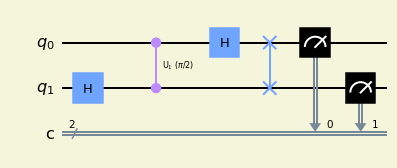

In [10]:
qc_2, q, c = QFT_2()
qc_2.measure(q, c)
#fig, ax = plt.subplots(1,1,figsize=(8,4))
qc_2.draw("mpl", style=style)
#plt.show()

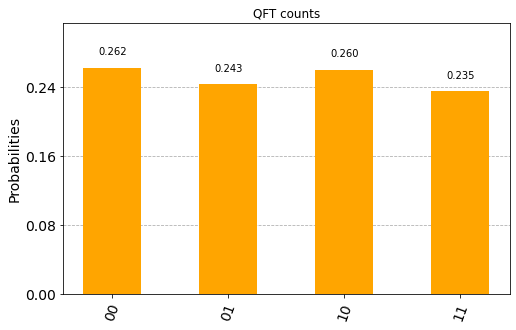

In [11]:
simulate_counts(qc_2,  figsize=(8,5))

<IPython.core.display.Latex object>

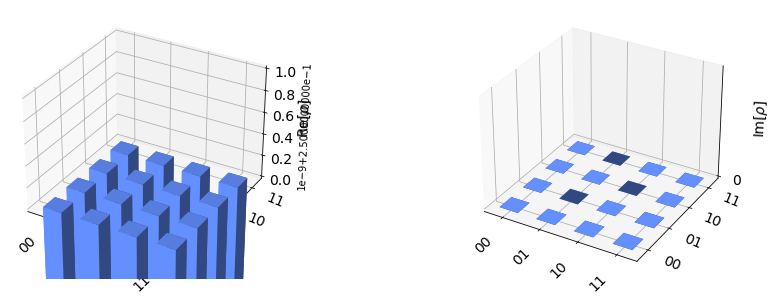

In [12]:
qc_2, q, c = QFT_2()
psi2 = simulate_state_vector(qc_2)

In [13]:
qc_2, q, c = QFT_2()
U2 = simulate_unitary_matrix(qc_2)
display( array_to_latex(U2) )

<IPython.core.display.Latex object>

In [14]:
display( array_to_latex(2*U2) )

<IPython.core.display.Latex object>

--------

### <font color="Purple">3 Qubits</font>

For three qubits circuit, ( $n=3,N=2^3=8$) 

$8^{th}$ root of unity:  $\omega_{n} = e^{\frac{2\pi i}{2^{n}}} = \Big( 1, i, -1, -i, \frac{1+i}{\sqrt 2}, \frac{-1+i}{\sqrt 2}, \frac{-1-i}{\sqrt 2}, \frac{1-i}{\sqrt 2} \Big)$ 


The primitive root:  $\omega= \frac{1+i}{\sqrt 2}$ 

### <font color="Purple">**Circuit Implementation : 3 qubits** </font>

In [15]:
def QFT_3():
    n=3
    
    # define quantum and classical registers
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')

    
    # Initiate the quantum circuit
    qc = QuantumCircuit(q, c)
    
    # apply Hadamard gate to q=2 qubit
    qc.h(q[2])
    
    # apply controlled rotation [1-> 2] with PI/ 2^(2-1) = PI/2
    qc.cu1(PI/2, q[1], q[2])
    
    # apply Hadamard gate to q=1 qubit
    qc.h(q[1])
    
    # apply controlled rotation [0-> 2] with PI/ 2^(2-0) = PI/4
    qc.cu1(PI/4, q[0], q[2])
    
    # apply controlled rotation [0-> 1] with PI/ 2^(2-1) = PI/2
    qc.cu1(PI/2, q[0], q[1])
    
    # apply Hadamard gate to q=0 qubit
    qc.h(q[0])
    
    # apply SWAP gate in 0 and 2 qubit
    qc.swap(q[0],q[2])
    return qc, q, c

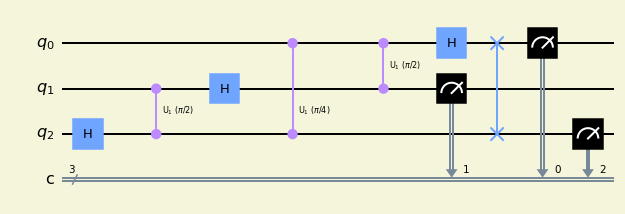

In [16]:
qc_3, q, c= QFT_3()
qc_3.measure(q, c)
qc_3.draw("mpl", style=style)

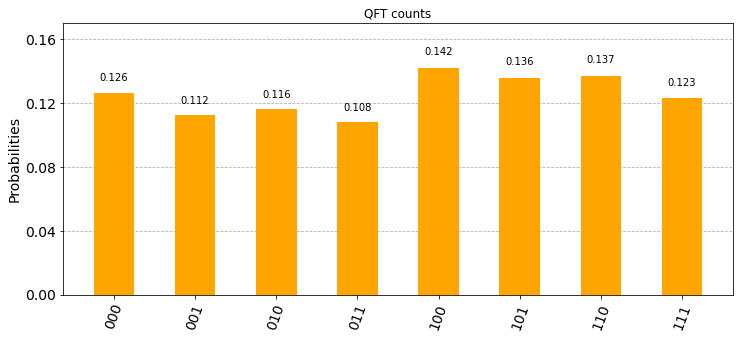

In [17]:
simulate_counts(qc_3,  figsize=(12,5))

<IPython.core.display.Latex object>

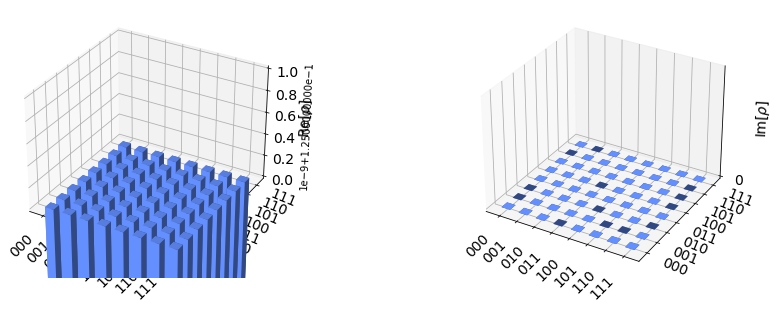

In [18]:
qc_3, q, c = QFT_3()
psi3 = simulate_state_vector(qc_3)

In [19]:
qc_3, q, c = QFT_3()
U3 = simulate_unitary_matrix(qc_3)
display( array_to_latex(U3) )

<IPython.core.display.Latex object>

In [20]:
display( array_to_latex(np.sqrt(8)*U3) )

<IPython.core.display.Latex object>

---------

## <font color="Purple">Genralized QFT Function </font>

Let's write a function which applies QFT to a circuit with any number of qubits.

In [21]:
def insert_rotation(ckt,q, n):
    if n == 0:
        return ckt
    n -= 1
    ckt.h(q[n])
    for qubit in range(n):
        ckt.cu1( PI/2**(n-qubit), q[qubit], q[n] )
    
    insert_rotation(ckt, q, n)
        
def swap_registers(ckt, q, n):
    for qubit in range(n//2):
        ckt.swap(q[qubit], q[n-qubit-1])
    return ckt

def QFT(n, ckt=None, q=None, c=None):
    if ckt is None:
        # define quantum and classical registers
        q = QuantumRegister(n, 'q')
        c = ClassicalRegister(n, 'c')
        ckt = QuantumCircuit(q, c)
        
    insert_rotation(ckt, q, n)
    swap_registers(ckt, q, n)
    return ckt, q, c

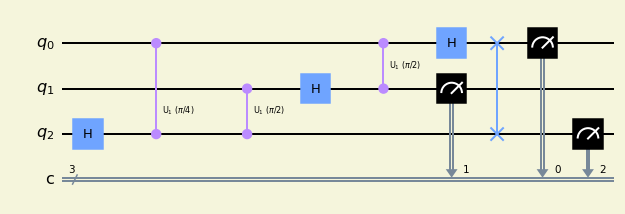

In [22]:
qc3, q, c = QFT(3)
qc3.measure(q,c)
qc3.draw("mpl", style=style)

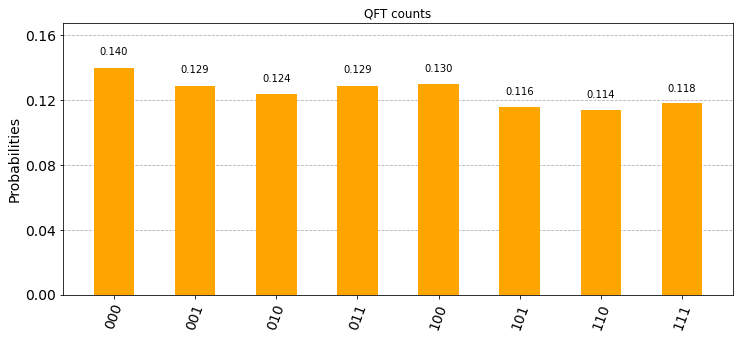

In [23]:
simulate_counts(qc3,  figsize=(12,5))

<IPython.core.display.Latex object>

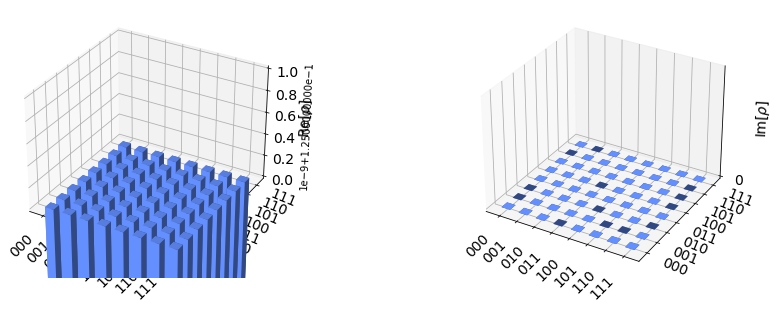

In [24]:
qc3, q, c = QFT(3)
psi = simulate_state_vector(qc3)

## <font color="Purple">QFT as implimented in Qiskit </font>

Qiskit has it's own QFT implimentation. It can be imported as `from qiskit.circuit.library import QFT`

In [25]:
from qiskit.circuit.library import QFT as QFT_q
warnings.filterwarnings("ignore")

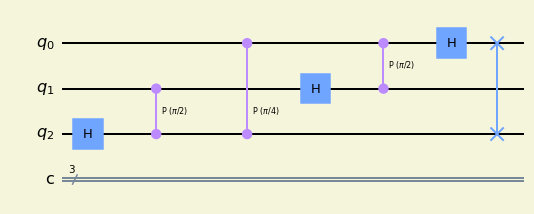

In [26]:
q = QuantumRegister(3,'q')
c = ClassicalRegister(3,'c')

qc = QuantumCircuit(q,c)
qc += QFT_q(num_qubits=3)
qc.draw(output='mpl', style=style)

<IPython.core.display.Latex object>

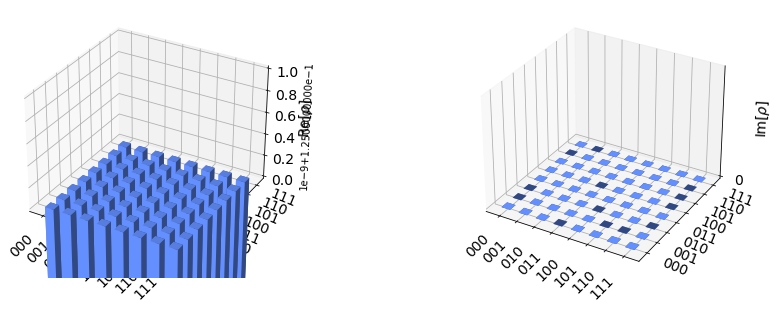

In [27]:
psi=simulate_state_vector(qc)

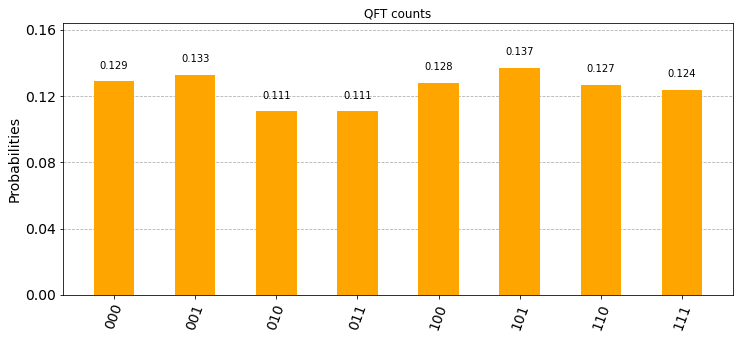

In [28]:
qc.measure(q,c)
simulate_counts(qc,  figsize=(12,5))

--------
## <font color="Purple">Data Encoding using QFT</font>

What happens if I apply QFT to an already constructed circuit? Let's encode number 5 to binary and encode that information in a quantum circuit.

In [29]:
my_number = 5
print (f"Decimal: {my_number} \nBinary: {bin(my_number)[2:]}")

Decimal: 5 
Binary: 101


In [30]:
def get_my_circuit():
    
    n=3
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')

    qc = QuantumCircuit(q, c)
    qc.x(q[0])
    qc.x(q[2])
    qc.draw('mpl', style=style)
    
    return qc, n, q, c

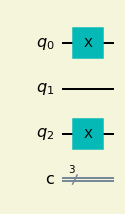

In [31]:
qc, n, q, c = get_my_circuit()
qc.draw("mpl", style=style)

<IPython.core.display.Latex object>

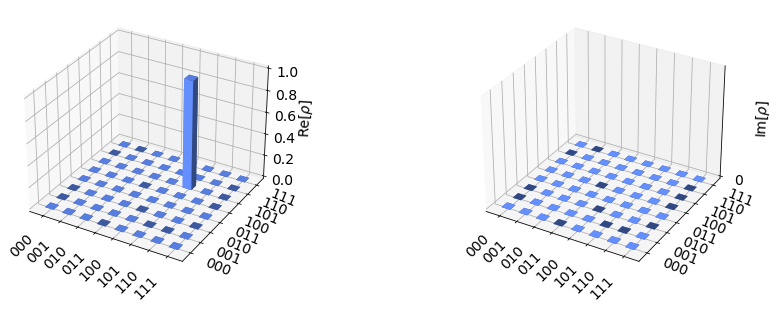

In [32]:
psi_init = simulate_state_vector(qc)

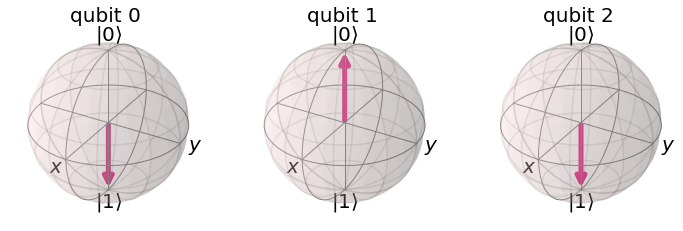

In [33]:
plot_bloch_multivector(psi_init)

Now apply QFT to the above circuit

In [34]:
qc, _, _=QFT(n, ckt=qc, q=q, c=c)

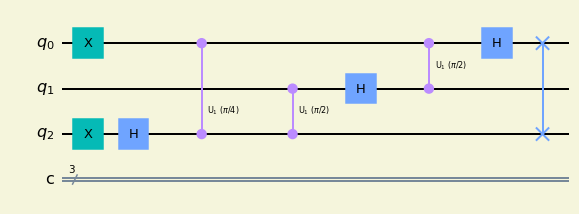

In [35]:
qc.draw("mpl", style=style)

<IPython.core.display.Latex object>

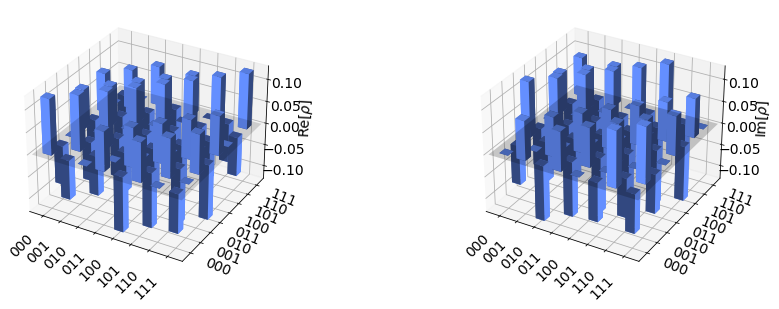

In [36]:
psi_ = simulate_state_vector(qc)

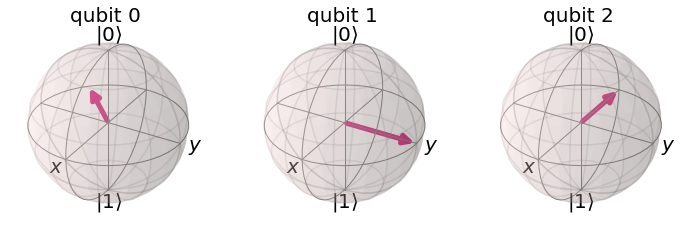

In [37]:
plot_bloch_multivector(psi_)

Compare these Bloch Vectors with the ones without any intial encoding.

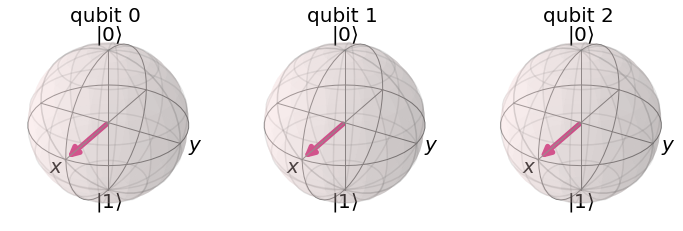

In [38]:
plot_bloch_multivector(psi3)

It turns out the QFT function has introduced an additional rotation on top of the $ | +++ \rangle$ state. Based on our initial encoding (5) the QFT has rotated the qubits by multiple of $5/2^3 = 5/8$ in the $xy$ plane.

Qantum circuit the data is encoded as a rotation angle to the qubits.

--------
## <font color="Purple">How about Inverse QFT?</font>

It turns out in the Qiskit implimentation, Inverse QFT is super simple.

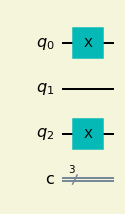

In [39]:
qc, n, q, c = get_my_circuit()
qc.draw("mpl", style=style)

In [40]:
# Add QFT circuit
qc += QFT_q(num_qubits=n, inverse=False, insert_barriers=False,)
# Add Inverse QFT circuit
qc += QFT_q(num_qubits=n, inverse=True, insert_barriers=True)


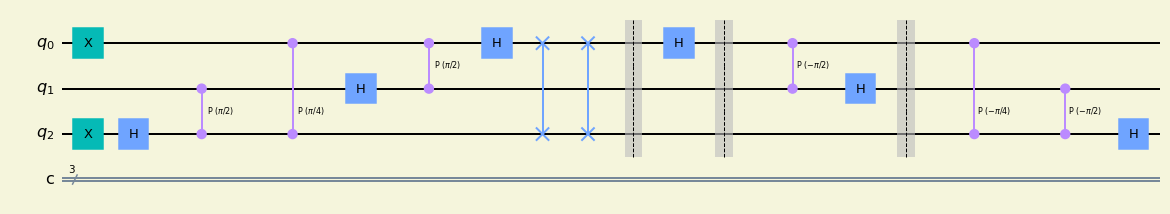

In [41]:
qc.draw(output='mpl', style=style)

<IPython.core.display.Latex object>

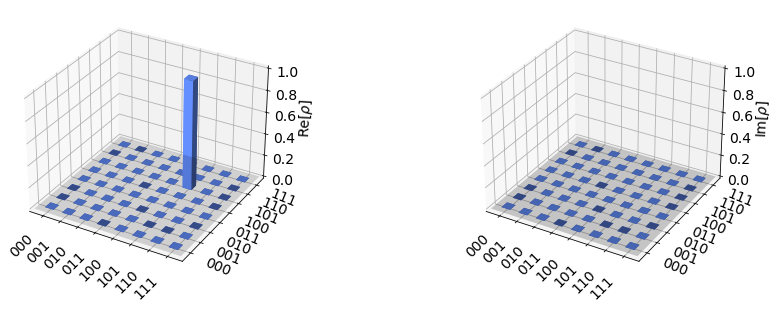

In [42]:
psi = simulate_state_vector(qc)

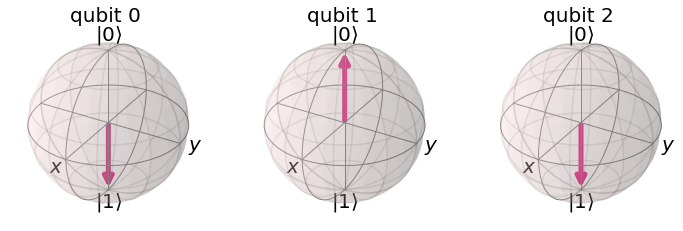

In [43]:
plot_bloch_multivector(psi)

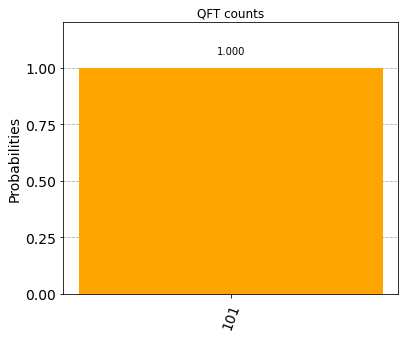

In [44]:
qc.measure(q,c)
simulate_counts(qc,  figsize=(6,5))

## <font color="Purple">Problems</font>

1. Show that QFT is a unitary transformation.
2. We showed that $\textbf{QFT}_1 = H. $ Is  $\textbf{QFT}_n = H^{⊗𝑛}$ ?
3. Explore (and think about it) how we can find the $N^{th}$ root of Unity using Euler's formula.

## <font color="Purple">References</font>


1. Robert Sutor, Dancing with Qubits, Chapter 10.
2. Nielson and Chuang, Quantum Computation and Quantum Information, Chapter 5.
2. https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html
3. https://en.wikipedia.org/wiki/Quantum_Fourier_transform   
4. Nice YouTube Video on Fourier Transformation https://www.youtube.com/watch?v=LznjC4Lo7lE
